# Logistic Regression

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [81]:
train = pd.read_csv('titanic_train.csv')

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

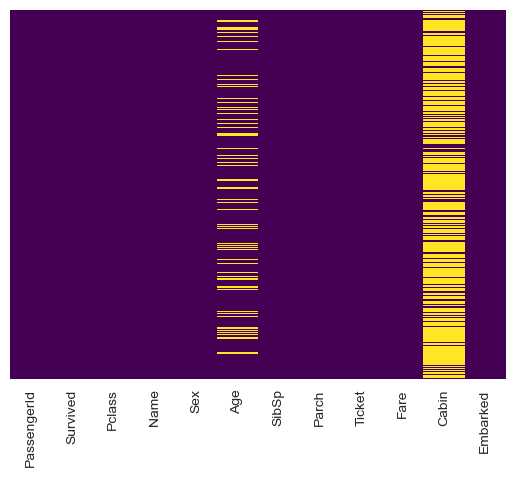

In [84]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [85]:
sns.set_style('whitegrid')

## for classification it is good to see the ratio of actual target label

<Axes: xlabel='Survived', ylabel='count'>

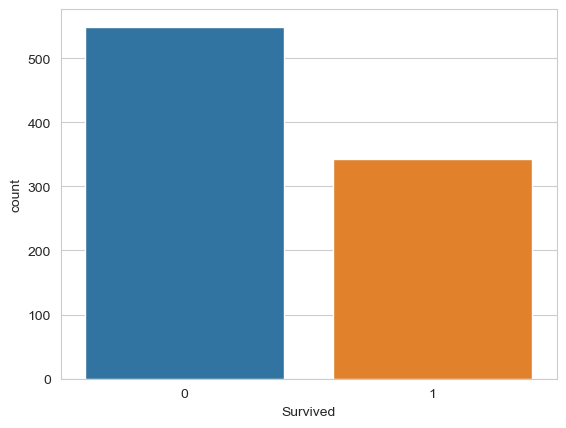

In [86]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

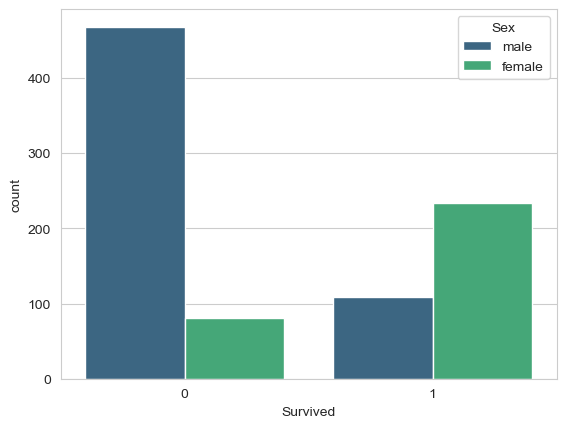

In [87]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='viridis')

<Axes: xlabel='Survived', ylabel='count'>

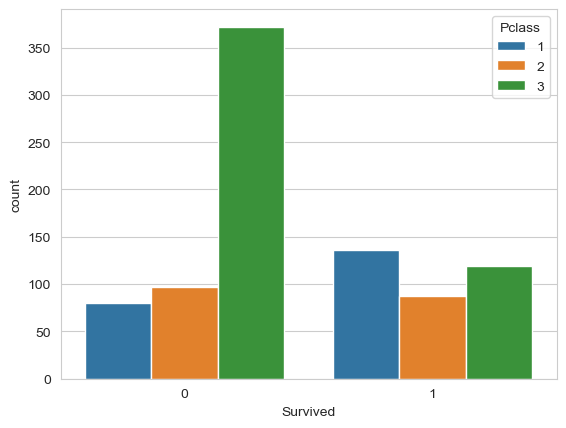

In [88]:
sns.countplot(x='Survived', data=train, hue='Pclass')

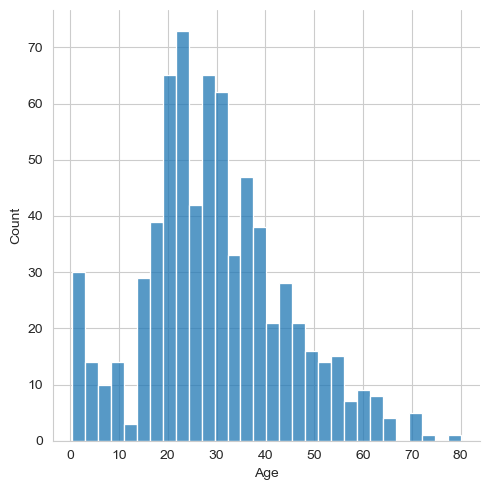

In [89]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

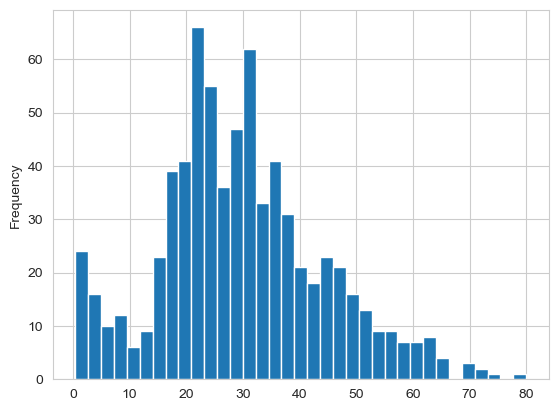

In [90]:
train['Age'].plot.hist(bins=35)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

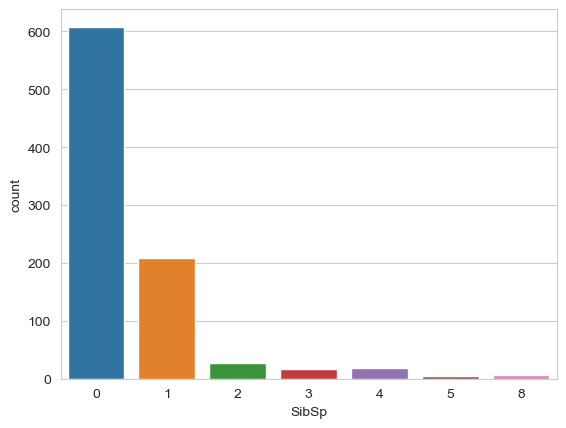

In [92]:
sns.countplot(x='SibSp', data=train)

<Axes: ylabel='Frequency'>

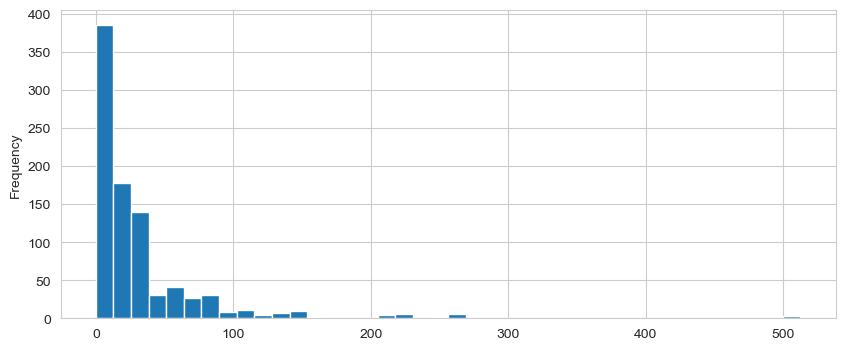

In [93]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))

# Cufflinks

In [94]:
!pip install cufflinks

In [95]:
import cufflinks as cf

In [96]:
cf.go_offline()

In [97]:
train['Fare'].iplot(kind='hist', bins=35)

# Data cleaning
* Data imputation: is the substitution of an estimated value that is as realisticas possible for 
    a missing or problematic data item

<Axes: xlabel='Pclass', ylabel='Age'>

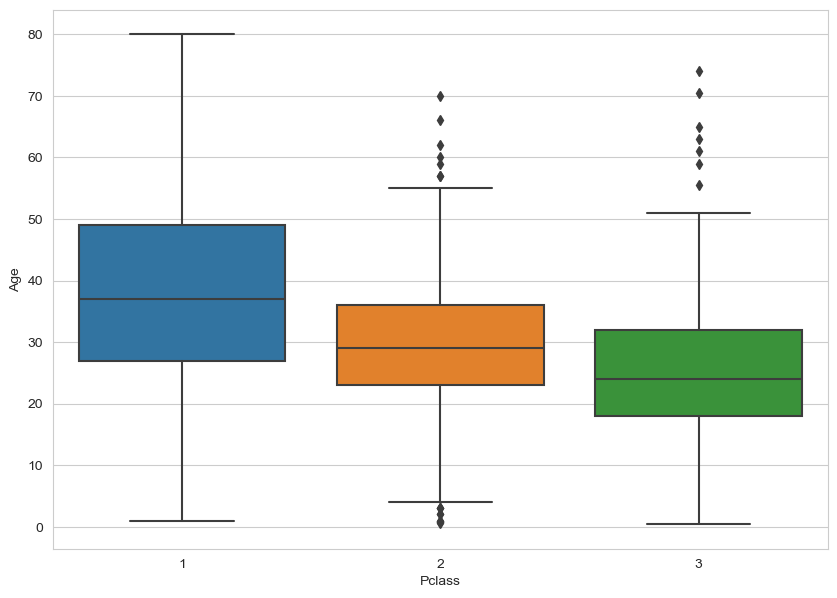

In [98]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y="Age", data = train)

## filling the missing value of age according to mean age of each Pclass

In [99]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [100]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

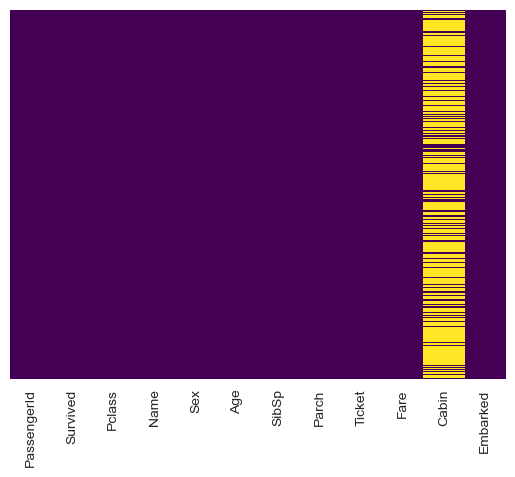

In [102]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## droping cabin column as it contain a lot of missing value so it is difficult to fill it

In [103]:
train.drop('Cabin', axis=1, inplace=True)

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## droping the remaining missing value

In [105]:
train.dropna(inplace = True) # remove all the remaining missing value

<Axes: >

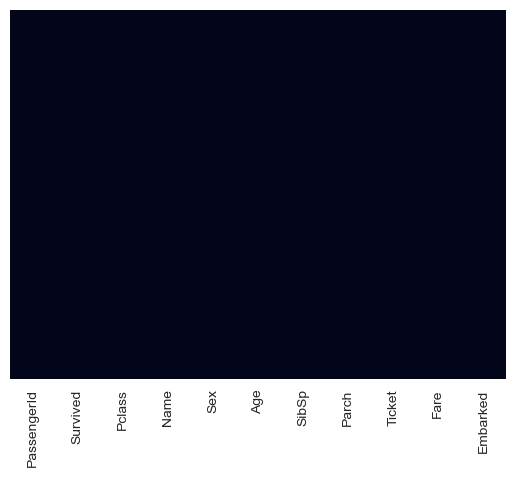

In [106]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

## deal with categorical feature
* creating the dummy variable as the string column that can't just take by machine learning model so it must be converted to integer column

In [107]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [108]:
sex = pd.get_dummies(train['Sex'],drop_first = True) # as one column is predictor of another so it generate a problem called Multicollinearity. and will be mesh with the algirithm as one column is predictors of another

In [109]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


* Including all dummy variables can lead to multicollinearity, which is a situation where predictor variables in a regression model are highly correlated. This can make it difficult to interpret the coefficients of the model.
* Using drop_first=True helps in avoiding multicollinearity by dropping the first dummy variable, which serves as the reference category for the others. This is especially useful in regression models where you want to ensure that your predictors are not linearly dependent.

In [110]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [111]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [112]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [113]:
train = pd.concat([train, sex, embark], axis = 1)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [115]:
train.drop(['Sex', 'Embarked','Name', 'Ticket'], axis=1, inplace= True)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [117]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [118]:
train.drop('PassengerId', axis=1, inplace=True)

In [119]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [120]:
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


# Train Test Split

In [121]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [122]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [125]:
from sklearn.linear_model import LogisticRegression

In [132]:
logmodel = LogisticRegression(max_iter=1000)

In [133]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [134]:
predictions = logmodel.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [137]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8314606741573034
